[*********************100%%**********************]  1 of 1 completed


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


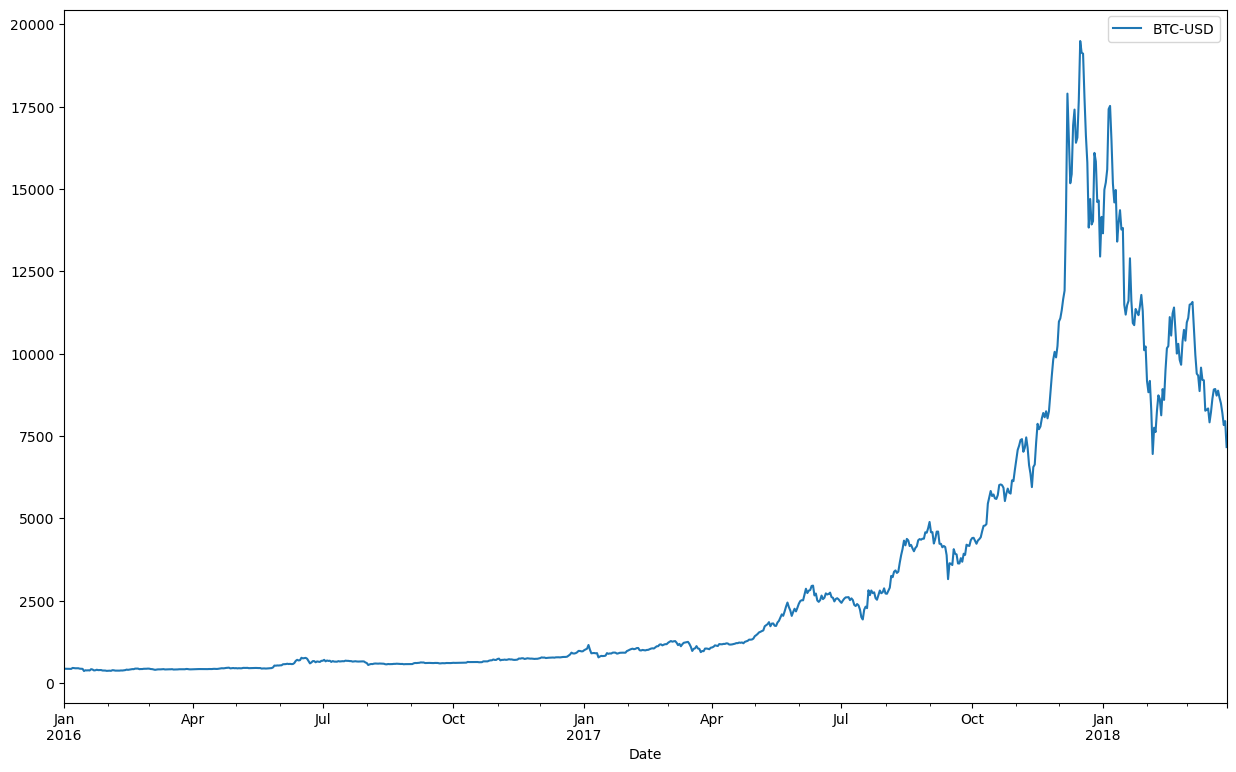

In [2]:
import pandas as pd

import datetime
import warnings
warnings.simplefilter("ignore")

import numpy as np
# We will look at stock prices over the past year, starting at January 1, 2016

start = datetime.datetime(2016,4,1)
end = datetime.datetime(2018,1,1)
start
end

import yfinance as yf

ticker = 'BTC-USD'
df = pd.DataFrame()
df[ticker] = yf.download(ticker, start="2016-01-01", end="2018-03-30")['Close']





import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

df.plot(grid = False) # Plot the adjusted closing price
close = df[ticker]

log_price=np.log(close)
simple_return = close.pct_change().dropna()
log_return = np.log(1+simple_return).dropna()




3. The Hurst exponent, $h$, is defined in terms of the Rescaled Range as follows:
$$
E\left[\frac{R(n)}{S(n)}\right]=C n^{H} \quad \text { as } n \rightarrow \infty
$$
Where:
- $\left[\frac{R(n)}{S(n)}\right]$ is the Rescaled Range.
- $E[x]$ is the expected value.
- $n$ is the time of the last observation (e.g. it corresponds to $X_{n}$ in the input time series data.)
- $h$ is a constant.
4. The Hurst exponent is a measure of autocorrelation (persistence and long memory).
- A value of $0<H<0.5$ indicates a time series with negative autocorrelation (e.g. a decrease between values will probably be followed by another decrease),
- A value of $0.5<H<1$ indicates a time series with positive autocorrelation (e.g. an increase between values will probably be followed by another increase),
- A value of $H=0.5$ indicates a "true random walk," where it is equally likely that a decrease or increase will follow from any particular value (e.g. the time series has no memory of previous values)
5. The Hurst exponent's namesake, Harold Edwin Hurst (1880-1978), was a British hydrologist who researched reservoir capacity along the Nile river.
6. The Rescaled Range is calculated for a time series, $X=X_{1}, X_{2}, \ldots, X_{n}$, as follows:
1. Calculate the mean:
$$
m=\frac{1}{n} \sum_{i=1}^{n} X_{i}
$$
2. Create a mean adjusted series:
$$
Y_{t}=X_{t}-m \quad \text { for } t=1,2, \ldots, n
$$
3. Calculate the cumulative deviate series Z:
$$
Z_{t}=\sum_{i=1}^{t} Y_{i} \quad \text { for } t=1,2, \ldots, n
$$

4. Create a range series $\mathrm{R}$ :
$$
R_{t}=\max \left(Z_{1}, Z_{2}, \ldots, Z_{t}\right)-\min \left(Z_{1}, Z_{2}, \ldots, Z_{t}\right) \quad \text { for } t=1,2, \ldots, n
$$
5. Create a standard deviation series $\mathrm{R}$ :
$$
S_{t}=\sqrt{\frac{1}{t} \sum_{i=1}^{t}\left(X_{i}-u\right)^{2}} \quad \text { for } t=1,2, \ldots, n
$$
Where:
$h$ is the mean for the time series values $X_{1}, X_{2}, \ldots, X_{t}$
6. Calculate the rescaled range series $(\mathrm{R} / \mathrm{S})$ :
$$
(R / S)_{t}=\frac{R_{t}}{S_{t}} \quad \text { for } t=1,2, \ldots, n
$$

6. Calculate the rescaled range series $(\mathrm{R} / \mathrm{S})$ :
$$
(R / S)_{t}=\frac{R_{t}}{S_{t}} \quad \text { for } t=1,2, \ldots, n
$$
7. The Hurst Exponent is estimated by fitting the power-law $E[R(n) / S(n)]=C \times n^{H}$ to the data. This is done by taking the logarithm of both sides, and fitting a straight line. The slope of the line gives $\mathrm{H}$ (i.e. Hurst Exponent Estimate).
8. The method above is known to produce a biased estimate of the power-law exponent, and for small data set, there is a deviation from $0.5$ slope (i.e. white-noise). Anis-Lloyd estimated the white-noise theoretical value of the $\mathrm{R} / \mathrm{S}$ statistics to be as follow:
$$
\mathrm{E}[R(n) / S(n)]=\left\{\begin{array}{ll}
\frac{\Gamma\left(\frac{n-1}{2}\right)}{\sqrt{\pi} \Gamma\left(\frac{n}{2}\right)} \sum_{i=1}^{n-1} \sqrt{\frac{n-i}{i}}, & \text { for } n \leq 340 \\
\frac{1}{\sqrt{n \frac{\pi}{2}}} \sum_{i=1}^{n-1} \sqrt{\frac{n-i}{i}}, & \text { for } n>340
\end{array}\right.
$$
Where $\Gamma$ is the Euler Gamma Function
9. No asymptotic distribution theory has been derived for most of the Hurst exponent estimators so far, but an approximate functional forms for Anis-Lloyd corrected $\mathrm{R} / \mathrm{S}$ estimate is available. For $95 \%$ confidence interval, the functional form for confidence interval limits are expressed as follow:
$$
\begin{aligned}
L L &=0.5-\frac{e^{4.21}}{\ln (M)^{7.33}} \\
U L &=0.5+\frac{e^{4.77}}{\ln (M)^{3.10}}
\end{aligned}
$$
Where $M=\log _{2}(N)$
10. Finally, The Anis-Lloyd corrected R/S Hurst exponent is calculated as $0.5$ plus the slope of $R(n) / S(n)-\mathrm{E}[R(n) / S(n)]$                           

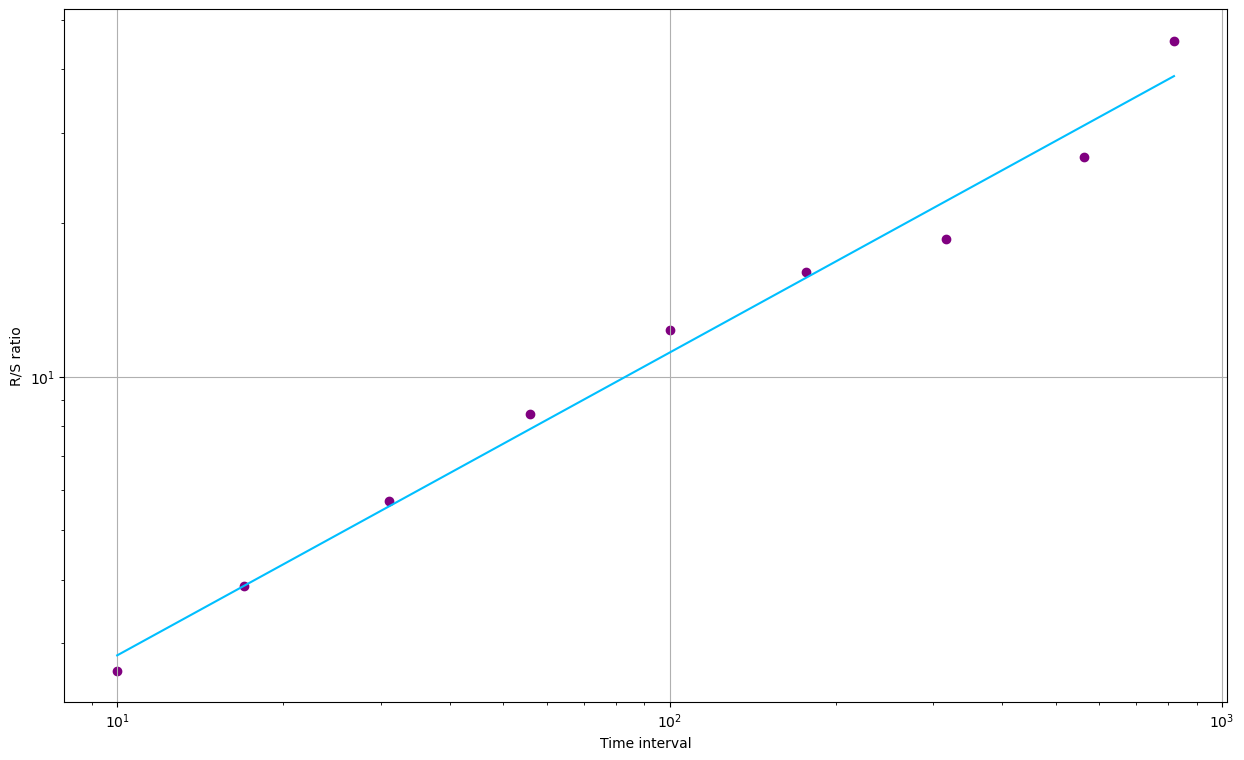

H=0.5934, c=0.7248


In [5]:
# Rescaled Range Analysis

from hurst import compute_Hc, random_walk


# Evaluate Hurst equation
H, c, data = compute_Hc(log_price, kind='price', simplified=False)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()
print("H={:.4f}, c={:.4f}".format(H,c))

In [8]:
#Estimate the corrected Hurst exponent
import nolds
H1=nolds.hurst_rs(log_return, nvals=None, fit='RANSAC', debug_plot=False, 
                 debug_data=False, plot_file=True, corrected=True, unbiased=True)
H1

0.5303038768518622

In [9]:
# Confidence Intervals according to Weron, Rafał (2002-09-01). 
#"Estimating long-range dependence: finite sample properties and confidence intervals".
#Physica A: Statistical Mechanics and its Applications. 312 (1–2): 285–299. arXiv:cond-mat/0103510. 
           # Bibcode:2002PhyA..312..285W. doi:10.1016/S0378-4371(02)00961-5.
N=len(log_return)
M=np.log2(N)
lower_limit_90=H1-np.exp(-7.35*np.log(np.log(M)) + 4.06)
upper_limit_90=np.exp(-7.07*np.log(np.log(M)) + 3.75) + H1
print(lower_limit_90)
print(upper_limit_90)


0.39003995522934326
0.6597183544894524


In [11]:
lower_limit_95=H1-np.exp(-7.33*np.log(np.log(M)) + 4.21)
upper_limit_95=H1+np.exp(-7.20*np.log(np.log(M)) + 4.04) 
print(lower_limit_95)
print(upper_limit_95)

0.3646470627325679
0.6857764381054376


In [36]:
lower_limit_99=H1-np.exp(-7.19*np.log(np.log(M)) + 4.34)
upper_limit_99=np.exp(-7.51*np.log(np.log(M)) + 4.58) + H1
print(lower_limit_99)
print(upper_limit_99)

0.3187106920216446
0.7372350235104469


In [37]:
#Detrended fluctuation analysis
from MFDFA import MFDFA
np.seterr(divide='ignore', invalid='ignore')
# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.1, 3, 100).astype(int))
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
y=np.array(log_price)

lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

[0.54931143]


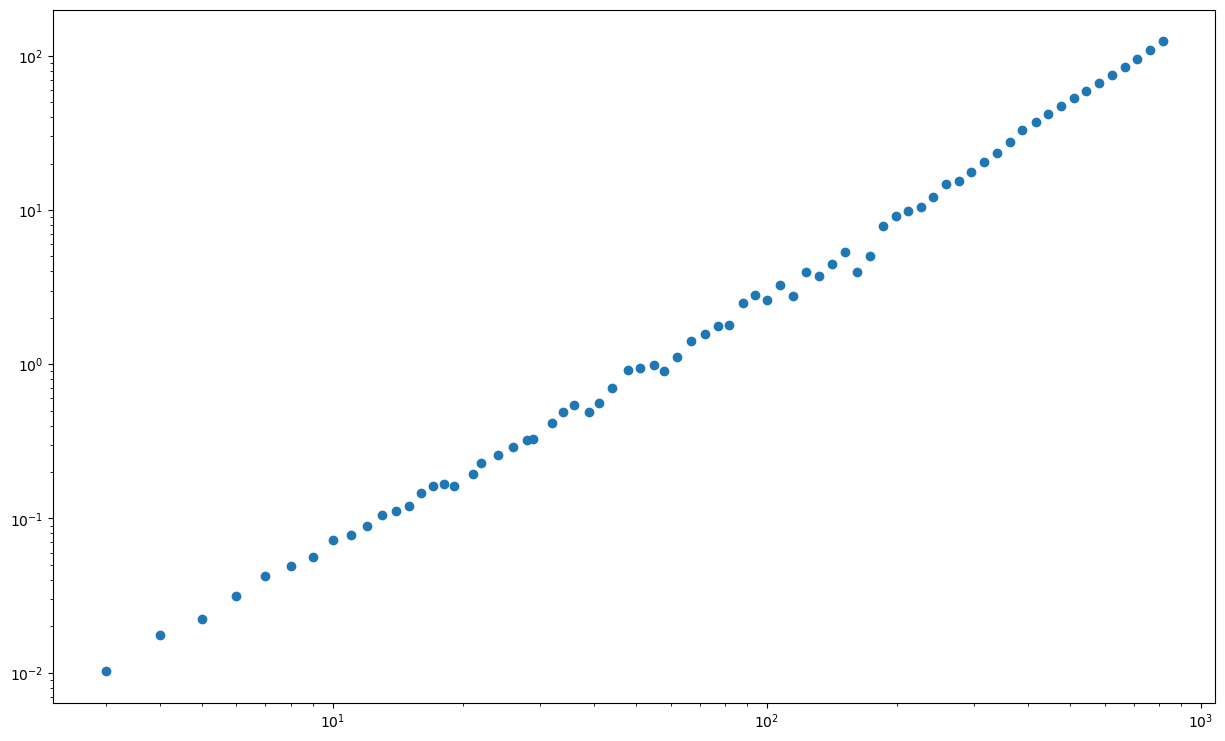

In [38]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
H=np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]-1
print(H)

# Now what you should obtain is: slope = H + 1

In [39]:
# Generalized Hurst exponent
####################################
# Calculates the generalized Hurst exponent H(q) from the scaling 
# of the renormalized q-moments of the distribution 
#
#       <|x(t+r)-x(t)|^q>/<x(t)^q> ~ r^[qH(q)]
#
####################################
# H = genhurst(S,q)
# S is 1xT data series (T>50 recommended)
# calculates H, specifies the exponent q
#
# example:
#   generalized Hurst exponent for a random vector
#   H=genhurst(np.random.rand(10000,1),3)
#
####################################
# for the generalized Hurst exponent method please refer to:
#
#   T. Di Matteo et al. Physica A 324 (2003) 183-188 
#   T. Di Matteo et al. Journal of Banking & Finance 29 (2005) 827-851
#   T. Di Matteo Quantitative Finance, 7 (2007) 21-36
#
####################################
##   written in Matlab : Tomaso Aste, 30/01/2013 ##
##   translated to Python (3.6) : Peter Rupprecht, p.t.r.rupprecht (AT) gmail.com, 25/05/2017 ##

 
import numpy as np
import warnings
 
def genhurst(S,q):

    L=len(S)       
    if L < 100:
        warnings.warn('Data series very short!')
       
    H = np.zeros((len(range(5,20)),1))
    k = 0
    
    for Tmax in range(5,20):
        
        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))
        
        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt] 
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )
            
        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1
        
    mH = np.mean(H)/q
    
    return mH
 


In [40]:
mH=genhurst(np.array(log_price),2)
mH

0.48453459136563704

In [41]:
x=nolds.fgn(1000, H=0.5)



In [42]:
H=nolds.hurst_rs(x, nvals=None, fit='RANSAC', debug_plot=False, 
                 debug_data=False, plot_file=True, corrected=True, unbiased=True)
H

0.4707162515570639

In [43]:
N=len(x)
M=np.log2(N)
lower_limit_95=H-np.exp(-7.33*np.log(np.log(M)) + 4.21)
upper_limit_95=H+np.exp(-7.20*np.log(np.log(M)) + 4.04) 
print(lower_limit_95)
print(upper_limit_95)

0.3200275065531491
0.6123786830539595
